### Visualization of candidate specimens

In [1]:
library(tidyverse)
library(ggplot2)
library(gbif.range)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [112]:
# load in specimen data
all_occurrences <- read.csv("./data/BrownUniversity-BRU_DwC-A/occurrences.csv")
specimens <- read.csv("./data/specimens.csv")
sliced <- read.csv("./data/sliced_specimens.csv")

selected <- read.csv("data/pranav_capstone_samples_2025-sampling_specimens.csv")
# plot_df <- df <- data.frame(
#   value = c(specimens$year, sliced$year),
#   group = factor(c(rep("ALL", length(specimens$year)), rep("SLICE", length(sliced$year))))
# )

# plot_df[is.na(plot_df)] <- 0

In [117]:
print(c(min(specimens$year, na.rm = TRUE), max(specimens$year, na.rm = TRUE)))

[1] 1838 2023


In [99]:
all_occurrence_years <- na.omit(all_occurrences[-which(all_occurrences$year == 860),]$year)
specimen_years <- na.omit(specimens$year)
sliced_years <- na.omit(sliced$year)

In [100]:
selected_years <- all_occurrences[all_occurrences$catalogNumber == selected$catalogNumber,]$year

Warning message in all_occurrences$catalogNumber == selected$catalogNumber:
“longer object length is not a multiple of shorter object length”


In [77]:
ref <- c(min(all_occurrence_years),max(all_occurrence_years))

breaks <- seq(ref[1], ref[2], by = 5)


specimen_bins <- cut(specimen_years, breaks = breaks, right = FALSE)
specimen_years_freq <- as.data.frame(table(factor(specimen_bins, levels = levels(specimen_bins)))) %>% mutate(Freq = (Freq/sum(Freq))*100) %>%
  rename(year = Var1) %>% rename(freq = Freq) %>%
  mutate(year = breaks[-length(breaks)]) %>%
  mutate(group = "SPECIMEN")

# specimen_years_freq

In [78]:
all_bins <- cut(all_occurrence_years, breaks = breaks, right = FALSE)
all_years_freq <- as.data.frame(table(factor(all_bins, levels = levels(all_bins)))) %>% mutate(Freq = (Freq/sum(Freq))*100) %>%
  rename(year = Var1) %>% rename(freq = Freq) %>%
  mutate(year = breaks[-length(breaks)]) %>%
  mutate(group = "ALL")

In [ ]:
# selected_bins <- cut(selected_years, breaks = breaks, right = FALSE)
# selected_years_freq <- as.data.frame(table(factor(selected_bins, levels = levels(selected_bins)))) %>% mutate(Freq = (Freq/sum(Freq))*100) %>%
#   rename(year = Var1) %>% rename(freq = Freq) %>%
#   mutate(year = breaks[-length(breaks)]) %>%
#   mutate(group = "SELECTED")

In [105]:
plot_df <- rbind(specimen_years_freq, all_years_freq)

In [110]:
g <- ggplot(plot_df, aes(x = year, y = freq, fill = group)) +
    geom_col(position = "dodge") + 
    scale_fill_manual(values = c("skyblue", "tomato", "springgreen")) +
    labs(title = "Distribution of Specimen Years",
         x = "Year",
         y = "Frequency (%)",
         fill = "Group") +
    theme_minimal()

In [111]:
ggsave(filename = "./figures/dist_years_hist.png", plot = g, height = 4 , width = 8)

In [36]:
ref <- min(all_occurrence_years):max(all_occurrence_years)

specimen_years_freq <- as.data.frame(table(factor(specimen_years, levels = ref))) %>% mutate(Freq = (Freq/sum(Freq))*100) %>%
  rename(year = Var1) %>% rename(freq = Freq) %>%
  mutate(year = as.numeric(as.character(year))) %>%
  mutate(group = "SPECIMEN")

# sliced_years_freq <- as.data.frame(table(factor(sliced_years, levels = ref))) %>% mutate(Freq = (Freq/sum(Freq))*100) %>%
#   rename(year = Var1) %>% rename(freq = Freq) %>%
#   mutate(year = as.numeric(as.character(year))) %>%
#   mutate(group = "SELECTED")

all_years_freq <- as.data.frame(table(factor(all_occurrence_years, levels = ref))) %>% mutate(Freq = (Freq/sum(Freq))*100) %>%
  rename(year = Var1) %>% rename(freq = Freq) %>%
  mutate(year = as.numeric(as.character(year))) %>%
  mutate(group = "ALL")

plot_df <- rbind(specimen_years_freq, all_years_freq)

In [37]:
dim(plot_df)

[1] 656   3

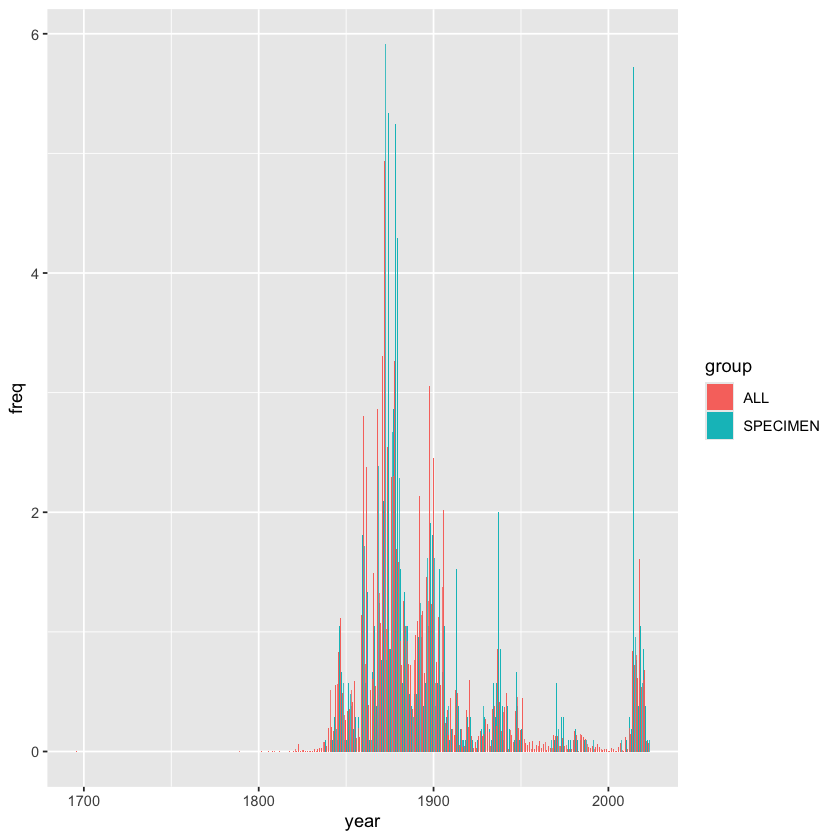

In [ ]:
ggplot(plot_df, aes(x = year, y = freq, fill = group)) +
    geom_col(position = "dodge") + 
    scale_fill_manual(values = c("skyblue", "tomato", "springgreen"))

In [56]:

plot_df <- df <- data.frame(
  value = c(all_occurrence_years, specimen_years, sliced_years),
  group = factor(c(rep("ALL", length(all_occurrence_years)), rep("NO BARCODE", length(specimen_years)), rep("SELECTED", length(sliced_years))))
)

In [ ]:
# plot_df <- data.frame(
#   value = c(specimen_years, sliced_years),
#   group = factor(c(rep("NB", length(specimen_years)), rep("SLICE", length(sliced_years))))
# )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


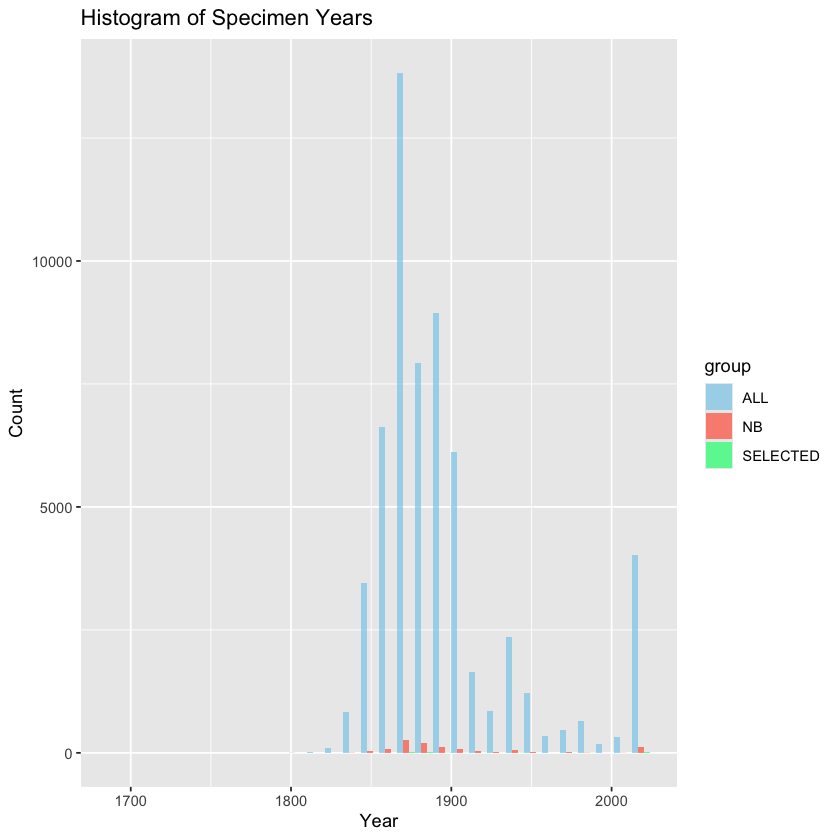

In [53]:
library(ggplot2)

ggplot(plot_df, aes(x = value, fill = group)) +
  geom_histogram(position = "dodge", alpha = 0.7) +
  scale_fill_manual(values = c("skyblue", "tomato", "springgreen")) +
  labs(title = "Histogram of Specimen Years",
       x = "Year",
       y = "Count")
# # par(mfrow=c(2,1))
# hist(all_occurrences_years, breaks = 50)
# hist(specimen_years, breaks = 50)
# hist(sliced_years, breaks = 50)

In [44]:
head(plot_df)

,value,group
,<int>,<fct>
1,1861,ALL
2,1870,ALL
3,1843,ALL
4,1884,ALL
5,1891,ALL
6,1844,ALL


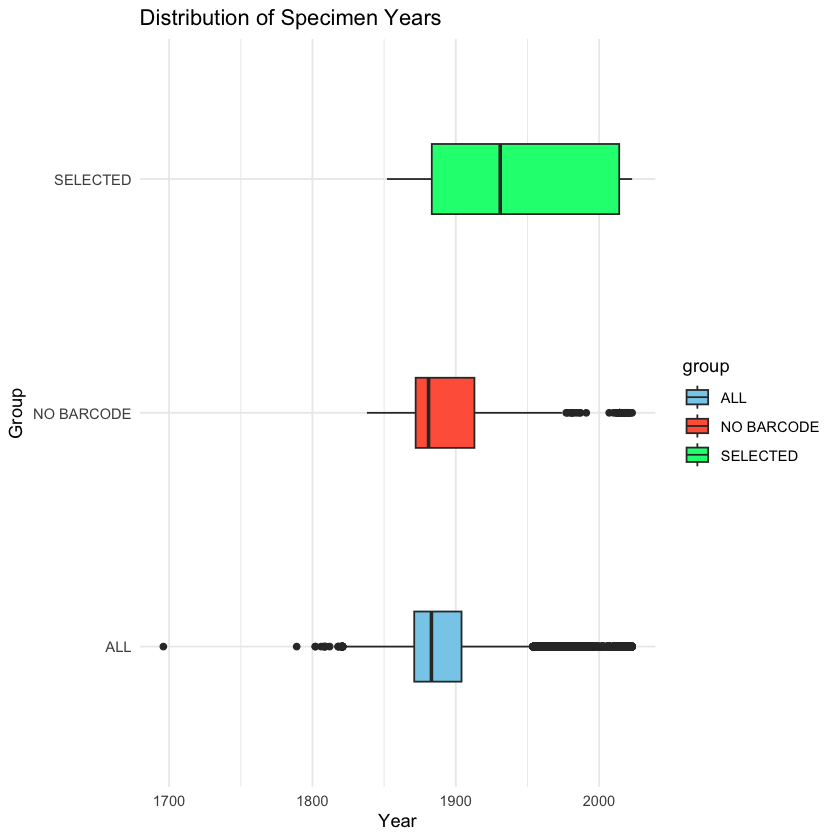

In [57]:
# par(mfrow=c(1,2))
# boxplot(specimens$year, na.rm = TRUE)
# boxplot(sliced$year, na.rm = TRUE)

# using ggplot2
ggplot(plot_df, aes(x = group, y = value, fill = group)) +
  geom_boxplot(width = 0.3) +
  scale_fill_manual(values = c("skyblue", "tomato", "springgreen")) +
  labs(title = "Distribution of Specimen Years",
       x = "Group",
       y = "Year") +
  coord_flip() +  # Makes the boxplots horizontal
  theme_minimal()


In [ ]:
all_occurrences <- read.csv("./data/BrownUniversity-BRU_DwC-A/occurrences.csv")

In [ ]:
# print(all_occurrences[which(all_occurrences$year == 860),])

[1] 1

In [ ]:
all_occurrences_years <- all_occurrences[-which(all_occurrences$year == 860),]$year

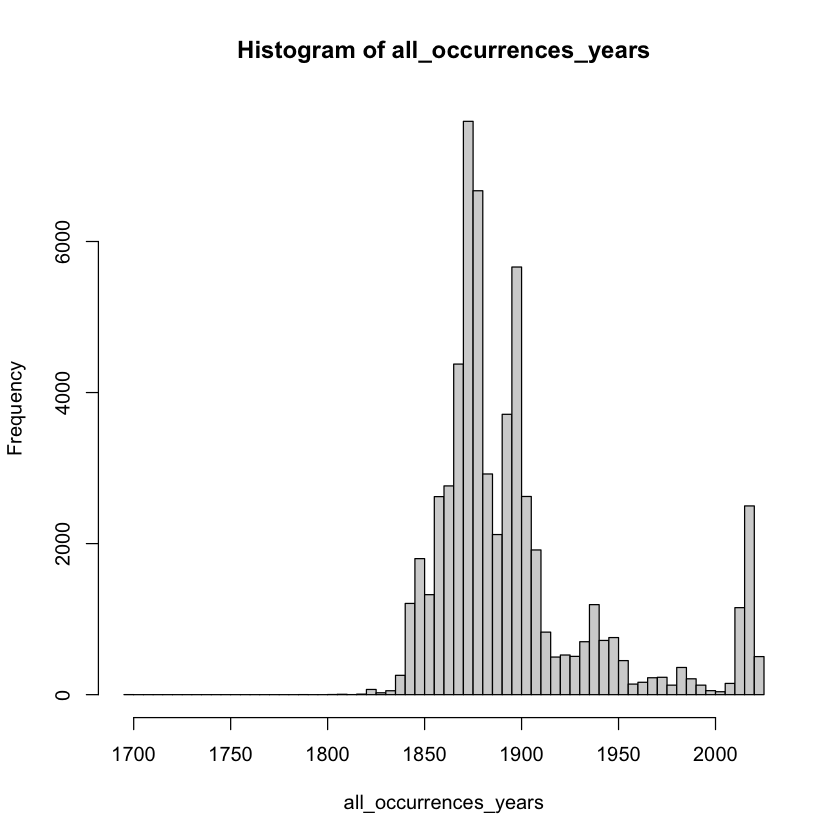

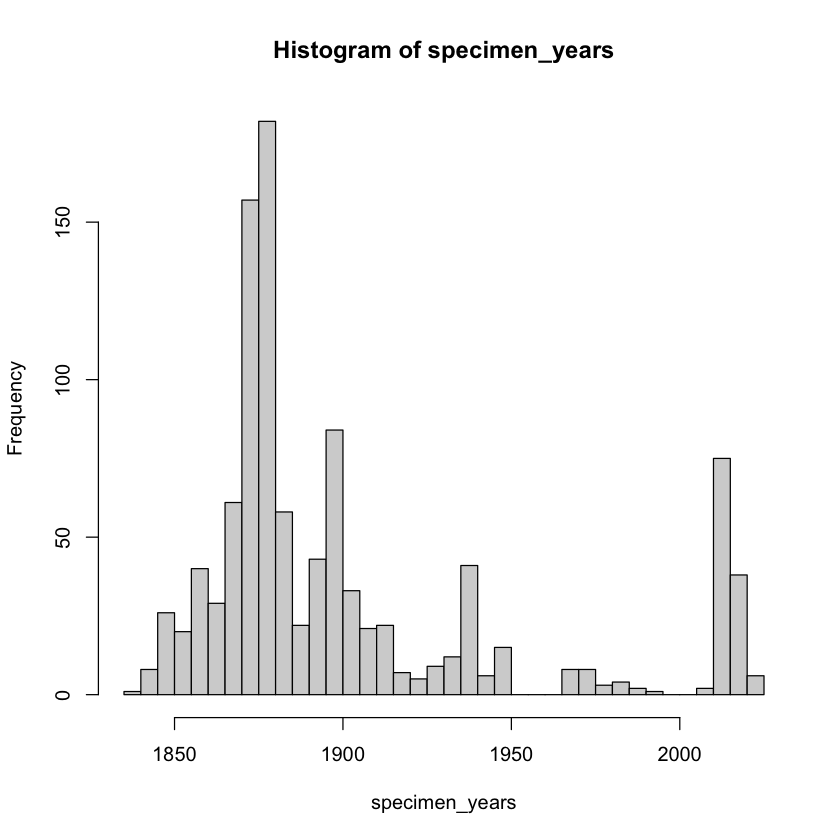

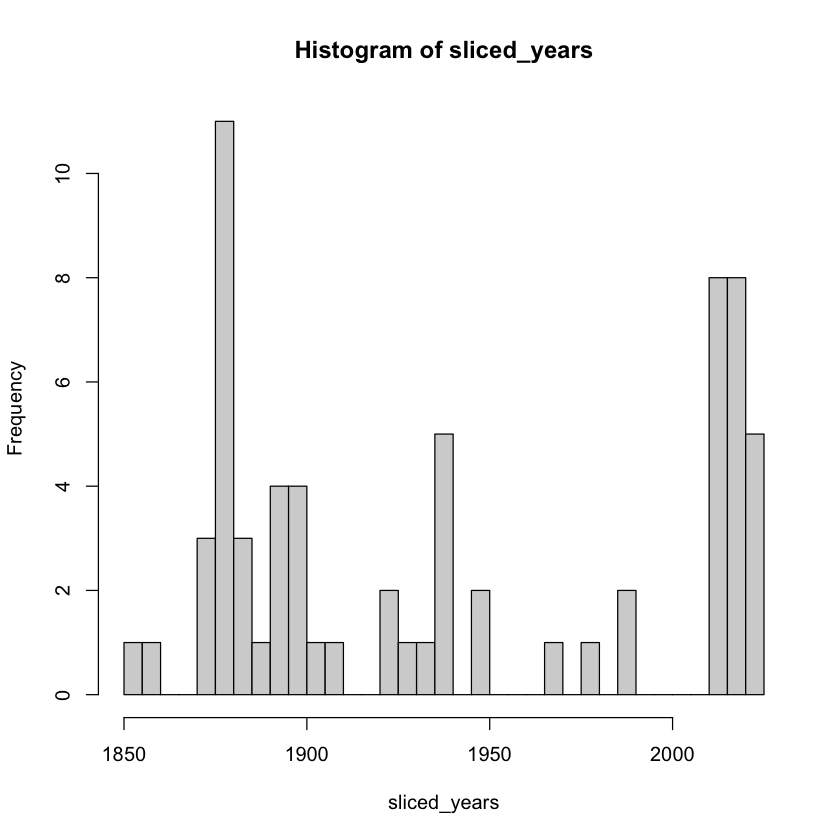

In [ ]:
specimen_years <- specimens$year
sliced_years <- sliced$year

# par(mfrow=c(2,1))
hist(all_occurrences_years, breaks = 50)
hist(specimen_years, breaks = 50)
hist(sliced_years, breaks = 50)

In [5]:
# install.packages("remotes")
# remotes::install_github("8Ginette8/gbif.range")
library(gbif.range)

>>>>>>>> Total number of records: 4755 
...GBIF records of Panthera tigris : download of all records starting... 
 ----------------- 100 %...
---> Grain filtering...
Records removed: 59 
---> Removal of duplicated records... 
Records removed: 2590 
---> Removal of absence records... 
Records removed: 0 
---> Basis of records selection... 
Records removed: 86 
---> Establishment of records selection... 
Records removed: 0 
---> Time period selection... 
Records removed: 0 
---> Removal of identical xy records... 
Records removed: 0 
---> Removal of raster centroids... 


Testing for rasterized collection

Testing for rasterized collection



Records removed: 0 


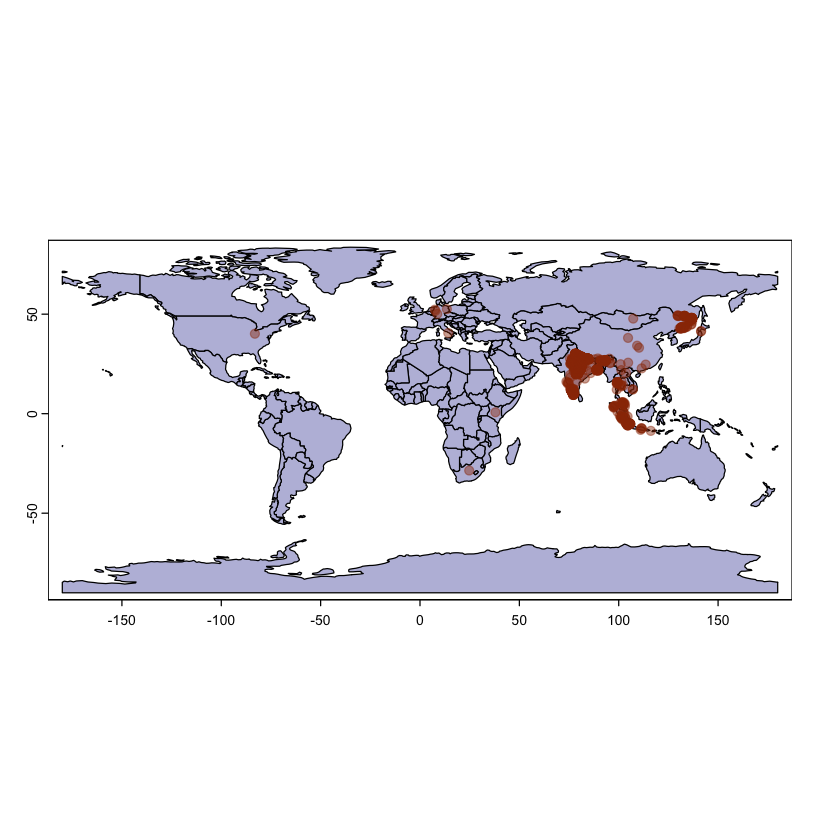

In [6]:
# Download
obs.pt <- get_gbif(sp_name = "Panthera tigris")

# Plot species records
countries <- rnaturalearth::ne_countries(type = "countries", returnclass = "sv")
terra::plot(countries, col = "#bcbddc")
points(obs.pt[, c("decimalLongitude","decimalLatitude")], pch = 20, col = "#99340470", cex = 1.5)

In [7]:

# Download ecoregion and read
eco.terra <- read_bioreg(bioreg_name = "eco_terra", save_dir = NULL)

# Range
range.tiger <- get_range(occ_coord = obs.pt,
                        bioreg = eco.terra,
                        bioreg_name = "ECO_NAME",
                        degrees_outlier = 5,
                        clustered_points_outlier = 3)

## Start of computation for species:  Panthera tigris  ### 
22 outlier's from 1999 | proportion from total points: 1%
bioregion 1  of  43 :  Amur Meadow Steppe 
bioregion 2  of  43 :  Brahmaputra Valley Semi-Evergreen Forests 
bioregion 3  of  43 :  Central Deccan Plateau Dry Deciduous Forests 
bioregion 4  of  43 :  Central Indochina Dry Forests 
bioregion 5  of  43 :  Chao Phraya Freshwater Swamp Forests 
bioregion 6  of  43 :  Chhota-Nagpur Dry Deciduous Forests 
bioregion 7  of  43 :  Deccan Thorn Scrub Forests 
bioregion 8  of  43 :  Eastern Highlands Moist Deciduous Forests 
bioregion 9  of  43 :  Eastern Himalayan Alpine Shrub And Meadows 
bioregion 10  of  43 :  Eastern Himalayan Broadleaf Forests 
bioregion 11  of  43 :  Eastern Java-Bali Rain Forests 
bioregion 12  of  43 :  Himalayan Subtropical Broadleaf Forests 
bioregion 13  of  43 :  Himalayan Subtropical Pine Forests 
bioregion 14  of  43 :  Kayah-Karen Montane Rain Forests 
bioregion 15  of  43 :  Khathiar-Gir Dry Deci

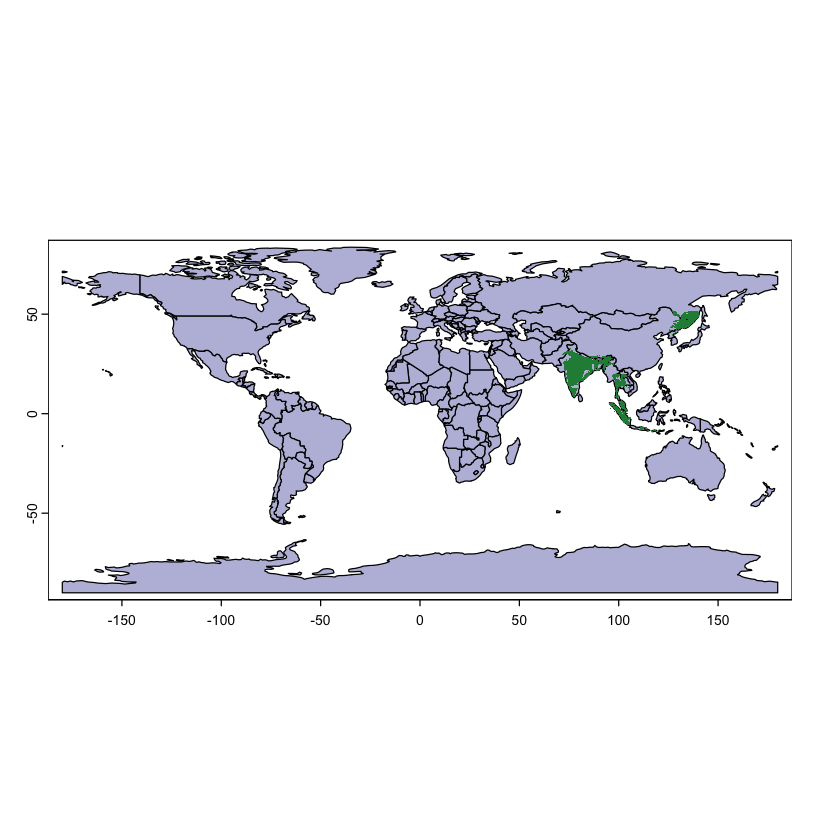

In [ ]:
terra::plot(countries, col = "#bcbddc")
terra::plot(range.tiger$rangeOutput, col = "#238b45", add = TRUE, axes = FALSE, legend = FALSE)

In [4]:
obs.pt <- get_gbif(sp_name = "Linnaea borealis", occ_samp = 10)
range.linnaea.borealis <- get_range(occ_coord = obs.pt,
                        bioreg = eco.terra,
                        bioreg_name = "ECO_NAME",
                        degrees_outlier = 5,
                        clustered_points_outlier = 3)

In [119]:
obs.pt <- get_gbif(sp_name = "Diervilla lonicera", occ_samp = 1000)
range.diervilla.lonicera <- get_range(occ_coord = obs.pt,
                        bioreg = eco.terra,
                        bioreg_name = "ECO_NAME",
                        degrees_outlier = 5,
                        clustered_points_outlier = 3)

ERROR: Error in get_gbif(sp_name = "Diervilla lonicera", occ_samp = 1000): could not find function "get_gbif"


In [ ]:
obs.pt <- get_gbif(sp_name = "Phacelia tanacetifolia", occ_samp = 1000)
range.phacelia.tanacetifolia <- get_range(occ_coord = obs.pt,
                        bioreg = eco.terra,
                        bioreg_name = "ECO_NAME",
                        degrees_outlier = 5,
                        clustered_points_outlier = 3)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'plot': object 'range.phacelia.tanacetifolia' not found


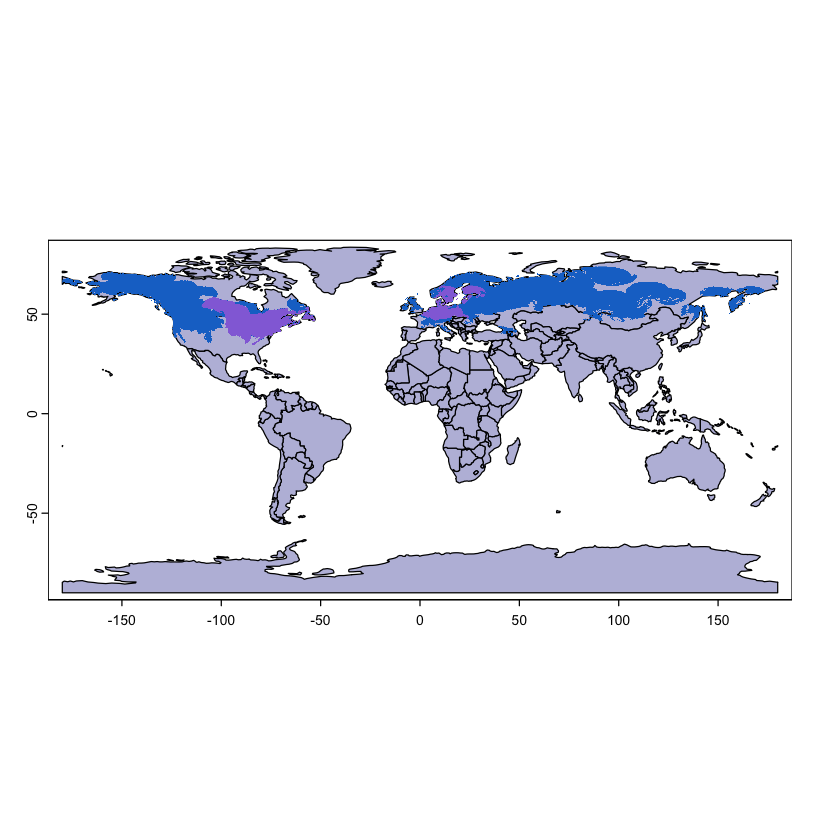

In [ ]:
terra::plot(countries, col = "#bcbddc")
terra::plot(range.linnaea.borealis$rangeOutput, col = "dodgerblue3", add = TRUE, axes = FALSE, legend = FALSE)
terra::plot(range.diervilla.lonicera$rangeOutput, col = "mediumpurple", add = TRUE, axes = FALSE, legend = FALSE)
terra::plot(range.phacelia.tanacetifolia$rangeOutput, col = "darkorange", add = TRUE, axes = FALSE, legend = FALSE)
# terra::plot(range.tiger$rangeOutput, col = "red4", add = TRUE, axes = FALSE, legend = FALSE)